In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from FRED_data_pull import *
from pathlib import Path
from datetime import datetime, timedelta
import os
import dotenv
dotenv.load_dotenv()
api_key = os.environ['FRED_API_KEY']
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error

from pandas.tseries.offsets import MonthEnd

In [2]:
copper = pull_data(['PCOPPUSDM'],
                 'm', api_key)
oil = pull_data(['DCOILWTICO'],
                 'm', api_key)
gasoline = pull_data(['GASREGW'],
                 'm', api_key)
credit_spreads = pull_data(['BAMLC0A1CAAA'],
                 'm', api_key)
mfg_hours = pull_data(['AWHMAN'],
                 'm', api_key)
new_orders = pull_data(['NEWORDER'],
                 'm', api_key)
consumer_new_orders = pull_data(['ACOGNO'],
                 'm', api_key)
housing_permits = pull_data(['PERMIT'],
                 'm', api_key)
yield_curve = pull_data(['T10Y2Y'],
                 'm', api_key)
claims = pull_data(['ICSA'],
                 'm', api_key)
cc_claims = pull_data(['CCSA'],
                 'm', api_key)
real_gdp = pull_data(['GDPC1'],
                 'q', api_key)
ind_pro = pull_data(['INDPRO'],
                 'm', api_key)
housing_starts = pull_data(['HOUST'],
                 'm', api_key)
retail_sales = pull_data(['RRSFS'],
                 'm', api_key)
pce = pull_data(['PCE'],
                 'm', api_key)
pce_prices = pull_data(['PCEPI'],
                 'm', api_key)
unemployment = pull_data(['UNRATE'],
                 'm', api_key)
nfp = pull_data(['PAYEMS'],
                 'm', api_key)
disposable_income = pull_data(['DSPIC96'],
                 'm', api_key)
average_hourly_earnings = pull_data(['AHETPI'],
                 'm', api_key)
capacity_utilization = pull_data(['TCU'],
                 'm', api_key)
stocks = pull_data(['SPASTT01USM661N'],
                 'm', api_key)
business_inventories = pull_data(['BUSINV'],
                 'm', api_key)

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1

In [3]:
file_path = Path("Monthly LEIs from FactSet.xlsx")
monthly_factset_df = pd.read_excel(file_path).set_index('date')
file_path = Path("Quarterly LEIs from FactSet.xlsx")
qtr_factset_df = pd.read_excel(file_path).set_index('date')

In [4]:
data_raw = pd.DataFrame()
#data_raw['DXY'] = dollar
data_raw['gas'] = gasoline
data_raw['oil'] = oil
data_raw['copper'] = copper
data_raw['credit_spreads'] = credit_spreads
data_raw['yield_curve'] = yield_curve
data_raw['mfg_hours'] = mfg_hours
data_raw['new_orders'] = new_orders
#data_raw['consumer_new_orders'] = consumer_new_orders
data_raw['housing_permits'] = housing_permits
data_raw['claims'] = claims
#data_raw['cc_claims'] = cc_claims
data_raw['ind_pro'] = ind_pro
data_raw['housing_starts'] = housing_starts
data_raw['nfp'] = nfp
data_raw['unemployment'] = unemployment
data_raw['retail_sales'] = retail_sales 
data_raw['pce'] = pce['PCE']/pce_prices['PCEPI']
data_raw['capacity_utilization'] = capacity_utilization
data_raw['disposable_income'] = disposable_income
data_raw['average_hourly_earnings'] = average_hourly_earnings
data_raw['stocks'] = stocks
data_raw['business_inventories'] = business_inventories


data_raw = data_raw[::-1]

data = (np.log(data_raw) - np.log(data_raw.shift(1)))[1:]
data['unemployment'] = data_raw['unemployment'] - data_raw['unemployment'].shift(1)
data['yield_curve'] = data_raw['yield_curve'] - data_raw['yield_curve'].shift(1)
data['credit_spreads'] = data_raw['credit_spreads'] - data_raw['credit_spreads'].shift(1)
data['capacity_utilization'] = data_raw['capacity_utilization'] - data_raw['capacity_utilization'].shift(1)

#data['housing_permits'] = np.log(data_raw['housing_permits'])
#data['housing_starts'] = np.log(data_raw['housing_starts'])

#data['credit_spreads'] = credit_spreads
#data['yield_curve'] = yield_curve
data['ism_mfg'] = monthly_factset_df[['ism_mfg']]
data['ism_services'] = monthly_factset_df[['ism_services']]
#data['consumer_expectations'] = monthly_factset_df[['consumer_expectations']]
data['expectations_vs_present'] = monthly_factset_df[['expectations_vs_present']] -  monthly_factset_df[['expectations_vs_present']].shift(1)
#data['EXPINF2YR'] = (data_raw['EXPINF2YR'].diff()*1200)[1:]

#data.iloc[-2,3] = np.nan
#data.iloc[-2,4] = np.nan
#data.iloc[-2,5] = np.nan
#data.iloc[-2,6] = np.nan
#data.iloc[-2,7] = np.nan
#data.iloc[-2,8] = np.nan
#data.iloc[-2,9] = np.nan

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


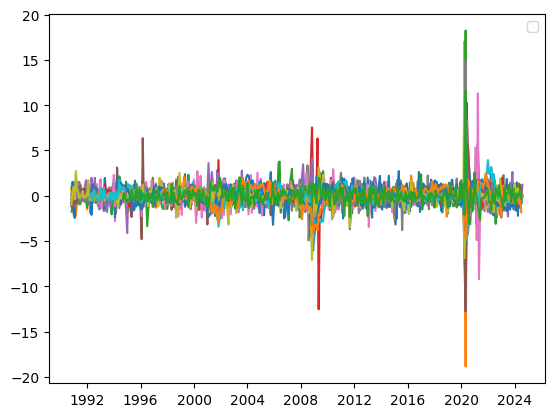

In [5]:
data_norm = (data - data.mean()) / data.std()
plt.plot(data_norm.index, data_norm)
plt.legend()
plt.show()

In [6]:
data_edited = data.copy()

#data_edited['ism_services'] = data_edited['ism_services'].shift(-1)
#data_edited['ism_mfg'] = data_edited['ism_mfg'].shift(-1)
#data_edited['mfg_hours'] = data_edited['mfg_hours'].shift(-1)
#data_edited['copper'] = data_edited['copper'].shift(1)

data_quarterly_raw = data_edited.resample('Q').mean()

In [7]:
data_quarterly_raw['ceo_confidence'] = qtr_factset_df[['ceo_confidence']]
#data_quarterly_raw['eps_growth'] = qtr_factset_df[['eps_growth']]
data_quarterly_raw['sloos'] = qtr_factset_df[['sloos']]
data_quarterly_raw['real_gdp'] = (np.log(real_gdp[::-1]) - np.log(real_gdp[::-1].shift(1)))

In [8]:
data_quarterly = data_quarterly_raw.copy().dropna()

In [9]:
#data_quarterly['ceo_confidence'] = data_quarterly['ceo_confidence'].shift(1)
#data_quarterly['sloos'] = data_quarterly['sloos'].shift(1)
#data_quarterly['consumer_expectations'] = data_quarterly['consumer_expectations'].shift(2)
#data_quarterly['ism_services'] = data_quarterly['ism_services'].shift(1)
#data_quarterly['ism_mfg'] = data_quarterly['ism_mfg'].shift(1)
#data_quarterly['yield_curve'] = data_quarterly['yield_curve'].shift(5)
#data_quarterly['expectations_vs_present'] = data_quarterly['expectations_vs_present'].shift(5)
#data_quarterly['credit_spreads'] = data_quarterly['credit_spreads'].shift(2)
data_quarterly['claims'] = data_quarterly['claims'].shift(1)
#data_quarterly['cc_claims'] = data_quarterly['cc_claims'].shift(1)
#data_quarterly['housing_permits'] = data_quarterly['housing_permits'].shift(2)
#data_quarterly['housing_starts'] = data_quarterly['housing_starts'].shift(4)
#data_quarterly['new_orders'] = data_quarterly['new_orders'].shift(1)
#data_quarterly['ind_pro'] = data_quarterly['ind_pro'].shift(1)
#data_quarterly['consumer_new_orders'] = data_quarterly['consumer_new_orders'].shift(1)
#data_quarterly['mfg_hours'] = data_quarterly['mfg_hours'].shift(1)
data_quarterly['copper'] = data_quarterly['copper'].shift(1)
#data_quarterly['oil'] = data_quarterly['oil'].shift(1)
#data_quarterly['gas'] = data_quarterly['gas'].shift(1)
#data_quarterly['real_gdp'] = data_quarterly['real_gdp'].shift(1)
#data_quarterly['retail_sales'] = data_quarterly['retail_sales'].shift(1)
#data_quarterly['pce'] = data_quarterly['pce'].shift(1)
data_quarterly.dropna(inplace=True)

#data_quarterly = data_quarterly.drop(columns = ['oil', 'gas','housing_permits','yield_curve', 'consumer_expectations','credit_spreads','cc_claims'])

In [10]:
data_quarterly.corr()

,gas,oil,copper,credit_spreads,yield_curve,mfg_hours,new_orders,housing_permits,claims,ind_pro,...,disposable_income,average_hourly_earnings,stocks,business_inventories,ism_mfg,ism_services,expectations_vs_present,ceo_confidence,sloos,real_gdp
gas,1.000000,0.773145,0.204891,-0.332649,0.120663,0.260540,0.280400,0.306750,-0.138142,0.125722,...,-0.023257,-0.062518,0.332538,0.304464,0.332078,0.245172,-0.197403,0.373118,-0.181005,0.168492
oil,0.773145,1.000000,0.142471,-0.381739,0.138717,0.167314,0.327082,0.322078,0.023818,0.222700,...,0.013507,-0.006069,0.470418,0.276104,0.320567,0.138437,0.019058,0.372493,-0.127230,0.085660
copper,0.204891,0.142471,1.000000,-0.317061,-0.103474,0.294557,0.458208,0.132225,-0.234327,0.375963,...,-0.014052,-0.079359,0.275310,0.316816,0.505407,0.383284,-0.143285,0.439839,-0.216426,0.238414
credit_spreads,-0.332649,-0.381739,-0.317061,1.000000,-0.124404,-0.204837,-0.281805,-0.451121,-0.100015,-0.114234,...,-0.035820,0.099517,-0.667083,0.114086,-0.124607,-0.039804,-0.240335,-0.262968,0.017452,-0.022861
yield_curve,0.120663,0.138717,-0.103474,-0.124404,1.000000,-0.002832,-0.135046,-0.000371,0.135320,-0.277909,...,0.125884,-0.019777,0.063597,-0.286068,-0.226167,-0.381043,0.250354,-0.074357,0.373351,-0.099968
mfg_hours,0.260540,0.167314,0.294557,-0.204837,-0.002832,1.000000,0.377865,0.354575,-0.534710,0.615280,...,-0.036567,-0.444050,0.236874,0.232627,0.471879,0.309591,-0.362038,0.434655,-0.137352,0.623079
new_orders,0.280400,0.327082,0.458208,-0.281805,-0.135046,0.377865,1.000000,0.218833,-0.224083,0.522157,...,0.017153,-0.086377,0.359167,0.419215,0.525699,0.437400,-0.145489,0.425241,-0.358163,0.389434
housing_permits,0.306750,0.322078,0.132225,-0.451121,-0.000371,0.354575,0.218833,1.000000,-0.096655,0.316634,...,0.042361,-0.218427,0.510600,0.128731,0.202365,0.231560,-0.027049,0.311384,-0.116574,0.305693
claims,-0.138142,0.023818,-0.234327,-0.100015,0.135320,-0.534710,-0.224083,-0.096655,1.000000,-0.521113,...,0.306411,0.332138,0.003005,-0.529959,-0.441518,-0.405841,0.654609,-0.288654,0.219747,-0.760695
ind_pro,0.125722,0.222700,0.375963,-0.114234,-0.277909,0.615280,0.522157,0.316634,-0.521113,1.000000,...,-0.112422,-0.263129,0.285059,0.540369,0.621643,0.533058,-0.428838,0.484577,-0.357346,0.651176


In [11]:
data_quarterly[['retail_sales','pce','ind_pro','housing_permits','real_gdp']].corr()

,retail_sales,pce,ind_pro,housing_permits,real_gdp
retail_sales,1.000000,0.787889,0.181423,0.354139,-0.037639
pce,0.787889,1.000000,0.432999,0.265960,0.337627
ind_pro,0.181423,0.432999,1.000000,0.316634,0.651176
housing_permits,0.354139,0.265960,0.316634,1.000000,0.305693
real_gdp,-0.037639,0.337627,0.651176,0.305693,1.000000


## Nowcasting Model

In [12]:
monthly_input = data.copy()
quarterly_input = qtr_factset_df.copy().drop(columns=['eps_growth'])
quarterly_input['real_gdp'] = (np.log(real_gdp[::-1]) - np.log(real_gdp[::-1].shift(1))) * 4

#monthly_input = monthly_input.drop(columns=['credit_spreads',
#                                            'consumer_expectations'])

#for i in range(5*3):
#    col_names = ['date'] + list(monthly_input.columns)
#    new_row = pd.DataFrame([[np.nan]*len(col_names)], columns = col_names)
#    new_row['date'] = monthly_input.index[-1] + MonthEnd(1)
#    new_row = new_row.set_index('date')
#    monthly_input = pd.concat([monthly_input, new_row])

#for i in range(3):
#    col_names = ['date'] + list(quarterly_input.columns)
#    new_row = pd.DataFrame([[np.nan]*len(col_names)], columns = col_names)
#    new_row['date'] = quarterly_input.index[-1] + MonthEnd(3)
#    new_row = new_row.set_index('date')
#    quarterly_input = pd.concat([quarterly_input, new_row])

In [13]:
#quarterly_input['ceo_confidence'] = quarterly_input['ceo_confidence'].shift(2)
#quarterly_input['sloos'] = quarterly_input['sloos'].shift(1)
#quarterly_input['real_gdp'] = quarterly_input['real_gdp'].shift(1)
#monthly_input['consumer_expectations'] = monthly_input['consumer_expectations'].shift(2*3)
#monthly_input['ism_services'] = monthly_input['ism_services'].shift(3*3)
#monthly_input['ism_mfg'] = monthly_input['ism_mfg'].shift(3*3)
#monthly_input['yield_curve'] = monthly_input['yield_curve'].shift(5*3)
#monthly_input['credit_spreads'] = monthly_input['credit_spreads'].shift(2*3)
#monthly_input['claims'] = monthly_input['claims'].shift(1*3)
#monthly_input['expectations_vs_present'] = monthly_input['expectations_vs_present'].shift(5*3)
#monthly_input['cc_claims'] = monthly_input['cc_claims'].shift(1*3)
#monthly_input['housing_permits'] = monthly_input['housing_permits'].shift(2*3)
#monthly_input['new_orders'] = monthly_input['new_orders'].shift(1*3)
#monthly_input['retail_sales'] = monthly_input['retail_sales'].shift(1*3)
#monthly_input['ind_pro'] = monthly_input['ind_pro'].shift(1*3)
#monthly_input['consumer_new_orders'] = monthly_input['consumer_new_orders'].shift(1*3)
#monthly_input['mfg_hours'] = monthly_input['mfg_hours'].shift(2*3)
#monthly_input['copper'] = monthly_input['copper'].shift(2*3)
#monthly_input['oil'] = monthly_input['oil'].shift(1*3)
#monthly_input['gas'] = monthly_input['gas'].shift(1*3)

#monthly_input = monthly_input[monthly_input.index >= '1997-07-31']
#monthly_input = monthly_input[monthly_input.index >= '1998-10-31']
#quarterly_input = quarterly_input[quarterly_input.index >= '1995-12-31']
monthly_input = monthly_input[monthly_input.index >= '1998-10-31']
monthly_input = monthly_input[monthly_input.index <= '2024-06-30']
quarterly_input = quarterly_input[quarterly_input.index >= '1998-12-31']

In [14]:
monthly_input.corr()

,gas,oil,copper,credit_spreads,yield_curve,mfg_hours,new_orders,housing_permits,claims,ind_pro,...,retail_sales,pce,capacity_utilization,disposable_income,average_hourly_earnings,stocks,business_inventories,ism_mfg,ism_services,expectations_vs_present
gas,1.000000,0.650230,0.393826,-0.139358,0.143731,0.264948,0.112413,0.210646,-0.137744,0.240941,...,0.235592,0.191699,0.247085,-0.060050,-0.151704,0.213193,0.233317,0.278374,0.254428,-0.201847
oil,0.650230,1.000000,0.435389,-0.160868,0.107140,0.373949,0.134048,0.289174,-0.469468,0.418722,...,0.516556,0.515693,0.418447,-0.179449,-0.338388,0.367791,0.171979,0.286531,0.175485,-0.187973
copper,0.393826,0.435389,1.000000,-0.308601,0.080885,0.153378,0.091347,0.075467,-0.151104,0.139679,...,0.170659,0.132003,0.156460,-0.028939,-0.065366,0.484855,0.094909,0.301433,0.192052,-0.012928
credit_spreads,-0.139358,-0.160868,-0.308601,1.000000,0.076982,-0.061956,-0.004211,-0.146156,0.210275,-0.028305,...,-0.153142,-0.091058,-0.034030,-0.020037,0.023286,-0.553641,0.079554,-0.062188,-0.027578,-0.165336
yield_curve,0.143731,0.107140,0.080885,0.076982,1.000000,0.013513,-0.092080,-0.003823,0.077965,-0.056193,...,0.028978,-0.022916,-0.063740,0.038424,-0.016136,-0.113346,-0.154112,-0.130905,-0.230953,0.045868
mfg_hours,0.264948,0.373949,0.153378,-0.061956,0.013513,1.000000,0.188106,0.330258,-0.345309,0.708388,...,0.542684,0.605264,0.698319,-0.217309,-0.634052,0.097260,0.064496,0.255327,0.262950,-0.431706
new_orders,0.112413,0.134048,0.091347,-0.004211,-0.092080,0.188106,1.000000,0.121931,-0.144176,0.289189,...,0.199615,0.230398,0.298768,-0.077924,-0.190417,0.104992,0.195299,0.229322,0.202613,-0.137499
housing_permits,0.210646,0.289174,0.075467,-0.146156,-0.003823,0.330258,0.121931,1.000000,-0.218378,0.348730,...,0.369242,0.357381,0.345486,-0.068651,-0.345160,0.143324,0.069397,0.128927,0.188288,-0.221982
claims,-0.137744,-0.469468,-0.151104,0.210275,0.077965,-0.345309,-0.144176,-0.218378,1.000000,-0.468995,...,-0.557772,-0.663123,-0.474963,0.112115,0.314431,-0.386659,-0.074496,-0.202370,-0.147936,0.074395
ind_pro,0.240941,0.418722,0.139679,-0.028305,-0.056193,0.708388,0.289189,0.348730,-0.468995,1.000000,...,0.610010,0.746430,0.989941,-0.137822,-0.631291,0.127921,0.220530,0.395000,0.430913,-0.514170


In [15]:
factors = {#'eps_growth': ['Global'],
           'real_gdp': ['Global'],
           'copper': ['Global', 'Commodities'],
           'oil': ['Global', 'Commodities'],
           'gas': ['Global', 'Commodities'],
           'mfg_hours': ['Global', 'Manufacturing'],
           'new_orders': ['Global', 'Manufacturing'],
           #'consumer_new_orders': ['Global', 'Manufacturing'],
           'ind_pro': ['Global', 'Manufacturing'],
           'ism_mfg': ['Global', 'Manufacturing'],
           'capacity_utilization': ['Global','Manufacturing'],
           'retail_sales': ['Global', 'Consumption and Non-Manufacturing'],
           'pce': ['Global', 'Consumption and Non-Manufacturing'],
           'expectations_vs_present': ['Global', 'Sentiment and Financial Conditions'],
           'ism_services': ['Global','Consumption and Non-Manufacturing'],
           'business_inventories': ['Global','Consumption and Non-Manufacturing'],
           #'ism_services': ['Global','ISM'],
           'housing_starts': ['Global','Housing'],
           'housing_permits': ['Global','Housing'],
           'average_hourly_earnings': ['Global','Income'],
           'disposable_income': ['Global','Income'],
           'ceo_confidence': ['Global', 'Sentiment and Financial Conditions'],
           'sloos': ['Global', 'Sentiment and Financial Conditions'],
           'nfp': ['Global', 'Labor'],
           'unemployment': ['Global', 'Labor'],
           'claims': ['Global', 'Labor'],
           'cc_claims': ['Global', 'Labor'],
           'yield_curve': ['Global', 'Sentiment and Financial Conditions'],
           'stocks': ['Global', 'Sentiment and Financial Conditions'],
           'credit_spreads': ['Global', 'Sentiment and Financial Conditions'],
          }
factor_orders = {'Global': 3}
factor_multiplicities = {'Global': 1}

In [16]:
monthly_input.index.freq='M'
quarterly_input.index.freq='Q'

#if quarterly_input[-1:].isna().any() is True:
#    cutoff = 2
#else:
#    cutoff = 1

#cutoff_date = quarterly_input.index[-cutoff]

cutoff = 1
cutoff_date = quarterly_input.dropna().index[-cutoff]


In [17]:
#cutoff = 1
#const_pre = np.ones(len(data)-cutoff)
model = sm.tsa.DynamicFactorMQ(monthly_input[monthly_input.index <= cutoff_date], endog_quarterly=quarterly_input[quarterly_input.index <= cutoff_date], factors=factors, factor_orders=3, factor_multiplicities=factor_multiplicities, freq = 'M')#, enforce_stationarity=False)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Model Specification: Dynamic Factor Model                         
===========================================================================================
Model:                Dynamic Factor Model   # of monthly variables:                     23
                   + 8 factors in 8 blocks   # of quarterly variables:                    3
                   + Mixed frequency (M/Q)   # of factor blocks:                          8
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                            1998-10   Standardize variables:                    True
                                 - 2024-03                                                 
                                                                Observed variables / factor loadings                                                               
===================================================================================================================================================================
          Dep. variable     Global Sentiment and Financial Conditions Manufacturing Consumption and Non-Manufacturing       Labor Commodities    Housing     Income
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
                    gas       X                                                                                                        X                           
                    oil       X                                                                                                        X                           
                 copper       X                                                                                                        X                           
         credit_spreads       X                    X                                                                                                               
            yield_curve       X                    X                                                                                                               
              mfg_hours       X                                             X                                                                                      
             new_orders       X                                             X                                                                                      
        housing_permits       X                                                                                                                     X              
                 claims       X                                                                                               X                                    
                ind_pro       X                                             X                                                                                      
         housing_starts       X                                                                                                                     X              
                    nfp       X                                                                                               X                                    
           unemployment       X                                                                                               X                                    
           retail_sales       X                                                                     X                                                              
                    pce       X                                                                     X                                                              
   capacity_utilization       X                                             X                       

In [18]:
results = model.fit(maxiter=1000000, disp=100)

print(results.summary())

EM start iterations, llf=-7691.6
EM iteration 100, llf=-7021.5, convergence criterion=6.0907e-06
EM iteration 200, llf=-7019.7, convergence criterion=1.4067e-06
EM converged at iteration 289, llf=-7019, convergence criterion=9.9219e-07 < tolerance=1e-06
                               Dynamic Factor Results                              
Dep. Variable:          "gas", and 25 more   No. Observations:                  306
Model:                Dynamic Factor Model   Log Likelihood               -7018.966
                   + 8 factors in 8 blocks   AIC                          14307.932
                   + Mixed frequency (M/Q)   BIC                          14810.616
                     + AR(1) idiosyncratic   HQIC                         14508.973
Date:                     Fri, 26 Jul 2024   EM Iterations                      289
Time:                             10:48:44                                         
Sample:                         10-31-1998                                

In [19]:
results.save('eps_model.pkl')

In [20]:
#if cutoff > 2:
#    results_appended = results.append(endog = monthly_input[monthly_input.index > cutoff_date], 
#                                      endog_quarterly = quarterly_input[quarterly_input.index > cutoff_date])
#else:
results_appended = results

# Specify the number of steps ahead you want to forecast
steps_ahead = 12  # For example, forecasting 12 months ahead
const_forecast = np.ones(steps_ahead)
# Generate forecasts
forecasts = results_appended.forecast(steps=steps_ahead)

forecast_dates = [cutoff_date + MonthEnd(i) for i in range(1, steps_ahead + 1)]

forecasts.index = forecast_dates

# The 'forecasts' variable now contains the forecasted values for each variable for the next 12 months
print(forecasts)


                 gas       oil    copper  credit_spreads  yield_curve  \
2024-04-30  0.025458  0.028559  0.021826       -0.014583    -0.011720   
2024-05-31  0.008059  0.009351  0.008673        0.008793    -0.004482   
2024-06-30  0.000349  0.000483  0.002432       -0.004146    -0.003243   
2024-07-31 -0.000374 -0.000401  0.001861       -0.001937    -0.002318   
2024-08-31  0.001568  0.002121  0.003469       -0.001190    -0.001816   
2024-09-30  0.003577  0.004874  0.005107       -0.001176    -0.001725   
2024-10-31  0.004546  0.006268  0.005887       -0.001384    -0.001721   
2024-11-30  0.004610  0.006383  0.005935       -0.001354    -0.001710   
2024-12-31  0.004304  0.005954  0.005687       -0.001338    -0.001702   
2025-01-31  0.004030  0.005564  0.005466       -0.001339    -0.001700   
2025-02-28  0.003914  0.005401  0.005371       -0.001340    -0.001699   
2025-03-31  0.003915  0.005405  0.005372       -0.001339    -0.001699   

            mfg_hours  new_orders  housing_permits

## Update Forecast

In [21]:
#start_date = str(data.index[-1])[:7]
#end_date = str(data.index[-1] + timedelta(32))[:7]
def get_news(data, data_quarterly, results, lookback=1, steps_ahead = 1):
    start_date = data_quarterly.dropna().index[-lookback]
    print(start_date)
    end_date = start_date + MonthEnd(steps_ahead*3)
    #end_date = start_date + relativedelta(months=lookback*3+1)
    #end_date = datetime(end_date.year, end_date.month, 1) - timedelta(days=1)
    print(end_date)
    #print(results.summary())

    #const_post_plus1 = np.ones(len(data) + 1)
    news = results.news(data, endog_quarterly = data_quarterly, start=start_date, end=end_date)
    return news

news = get_news(monthly_input, quarterly_input, results_appended)

print(news.summary())

2024-03-31 00:00:00
2024-06-30 00:00:00
                                      News                                     
Model:                DynamicFactorMQ   Original sample:                1998-10
Date:                Fri, 26 Jul 2024                                 - 2024-03
Time:                        10:48:46   Update through:                 2024-06
                                        # of revisions:                       0
                                        # of new datapoints:                 68
                                     Impacts                                     
impact date       impacted variable estimate (prev) impact of news estimate (new)
---------------------------------------------------------------------------------
    2024-04 average_hourly_earnings            0.00          -0.00           0.00
        NaT    business_inventories           -0.00           0.00           0.00
        NaT    capacity_utilization           -0.17           0.13    

In [22]:
def update_forecast_data(forecast_df, news):#,length=2):
    #if length < 2:
    #    length = 2
    
    new_df = forecast_df.copy()
    #num_cols = len(new_df.columns)
    for i in range(len(news.impacts)):
        revision_date = news.impacts.index[i][0]
        revision_date = pd.to_datetime(str(revision_date) + "-01") + MonthEnd(1)
        #print(revision_date)
        col_name = news.impacts.index[i][1]
        new_df.loc[revision_date, col_name] = news.impacts.iloc[i,4]
    return new_df


def combine_data(history_df, forecast_df):
    #print(data)
    num_cols = len(history_df.columns)
    if num_cols == len(forecast_df.columns):
        new_df = pd.concat([history_df, forecast_df])
        #new_df = new_df[~new_df.index.duplicated(keep='first')]
        for i in range(num_cols):
            for j in range(1, len(forecast_df)+1):
                if np.isnan(new_df.iloc[-j,i]):
                    new_df.iloc[-j,i] = forecast_df.iloc[-j,i]
        return new_df
    else:
        raise ValueError()

new_forecasts = update_forecast_data(forecasts, news)
#new_forecasts.index = new_forecasts.index.to_timestamp('M')
new_forecasts_quarterly = new_forecasts[quarterly_input.columns].resample('Q').last()
new_data = combine_data(quarterly_input, new_forecasts_quarterly)
new_data.tail(10)

,ceo_confidence,sloos,real_gdp
2022-12-31,32.000000,39.100000,0.025336
2023-03-31,43.000000,44.800000,0.022194
2023-06-30,42.000000,46.000000,0.020393
2023-09-30,48.000000,50.800000,0.047472
2023-12-31,46.000000,33.900000,0.033396
2024-03-31,53.000000,14.500000,0.013997
2024-06-30,53.987816,8.511850,0.024325
2024-09-30,52.993263,8.375185,0.021367
2024-12-31,52.914470,8.213940,0.022392
2025-03-31,52.909995,8.114866,0.021802


## Recursive Estimation

In [23]:
def recursive_estimation(data_monthly, data_quarterly, y_names: list, factors = 1, factor_orders = 3, factor_multiplicities = 1, steps_ahead = 1, start_point = 50, missing_vars_q = None, missing_vars_m = None):

    for y_name in y_names:
        if (y_name not in data_monthly.columns) and (y_name not in data_quarterly.columns):
            raise ValueError()
    
    # Find missing vars based on distance from last quarter of full data if no missing vars are inputted 
   # cutoff_date = data_quarterly.dropna().index[-1]
    #next_quarter = cutoff_date+MonthEnd(steps_ahead*3)

    num_blanks_q = len(data_quarterly) - len(data_quarterly.dropna())
    if missing_vars_q is None:
        #missing_vars_q = quarterly_input[quarterly_input.index <= next_quarter].iloc[-num_blanks:].isna().reset_index(drop = True)
        missing_vars_q = quarterly_input.iloc[-num_blanks_q:].isna().reset_index(drop = True)

    num_blanks_m = len(data_monthly) - len(data_monthly.dropna())
    if missing_vars_m is None:
        #missing_vars_m = monthly_input[monthly_input.index <= next_quarter].iloc[-num_blanks*3:].isna().reset_index(drop = True)
        missing_vars_m = monthly_input.iloc[-num_blanks_m:].isna().reset_index(drop = True)

    #if data.index[2] != data_quarterly.index[0]:
        

    #all_columns = list(data_monthly.columns) + list(data_quarterly.columns)
    errors_df = pd.DataFrame(0, index=range(steps_ahead), columns=data_quarterly.columns)
    preds_dfs = [pd.DataFrame(columns=data_quarterly.columns)]*steps_ahead

    if steps_ahead > num_blanks_q:
        T = steps_ahead
    else:
        T = num_blanks_q
    
    for i in range(start_point, len(data_quarterly.dropna())-steps_ahead+1):
    #for i in range(start_point, len(data_quarterly.dropna())-T+1):
        print(len(data_quarterly.dropna()) - i)
        #print(i)
        print(f"Training Sample Ending {str(data_quarterly[:i].index[-1])}")
        model = sm.tsa.DynamicFactorMQ(data_monthly[:i*3], endog_quarterly = data_quarterly[:i], factors=factors, factor_orders=factor_orders, factor_multiplicities = factor_multiplicities)#,enforce_stationarity=False)
        results = model.fit(maxiter=100000, disp=100)

        # Generate forecasts and adjust datetime index to be compatible with rest of data
        forecasts = results.forecast(steps=steps_ahead*3)
        forecast_dates = [data_quarterly.index[i-1] + MonthEnd(k) for k in range(1, steps_ahead*3 + 1)]
        forecasts.index = forecast_dates
        #print(forecasts)

        if missing_vars_q.any().any() or missing_vars_m.any().any():

            # Extend monthly data to include "news"
            #new_cutoff_m = (i+steps_ahead)*3
            new_cutoff_m = i*3+num_blanks_m
            new_data_monthly = data_monthly.copy()[:new_cutoff_m]

            # Extend quarterly data to include "news"
            #new_cutoff_q = i_steps_ahead
            new_cutoff_q = i+num_blanks_q
            new_data_quarterly = data_quarterly.copy()[:new_cutoff_q]

            # Replace values in new monthly data with NAs based on inputted missing variables
            for j, _ in enumerate(new_data_monthly.columns):
                for k in range(num_blanks_m):
                    if missing_vars_m.iloc[k, j] == True:
                        new_data_monthly.iloc[i*3+k, j] = np.nan

           # Replace values in new quarterly data with NAs based on inputted missing variables
            for j, _ in enumerate(new_data_quarterly.columns):
                for k in range(num_blanks_q):
                    if missing_vars_q.iloc[k, j] == True:
                        new_data_quarterly.iloc[i+k, j] = np.nan

            news = get_news(new_data_monthly, new_data_quarterly, results, steps_ahead = steps_ahead)
            #print(new_data_quarterly)
            #print(new_data_monthly)
            #print(news.summary())
            forecasts = update_forecast_data(forecasts, news)
            #print(forecasts)
            #forecasts.index = forecasts.index.to_timestamp('M')
            forecasts = forecasts[data_quarterly.columns].resample('Q').last()
            forecasts = forecasts[:steps_ahead]
            #print(forecasts)
            
        # Compare Observed Values with Forecast and Record Results
        observed = data_quarterly.copy()[i:i+steps_ahead]
        has_nans = observed.isna().any().any()
        if not has_nans:
            error = (forecasts - observed).reset_index(drop = True)
            errors_df = errors_df + error**2
        #display(errors_df)
        
        for k in range(steps_ahead):
            preds_dfs[k] = pd.concat([preds_dfs[k], forecasts[k:k+1]])

    errors_df = (errors_df / (len(data_quarterly.dropna()) - start_point - steps_ahead + 1))**0.5
    
    errors_df = errors_df[y_names]
        
    return preds_dfs, errors_df

In [24]:
steps_ahead = 1

#next_quarter = cutoff_date+MonthEnd(steps_ahead*3)

start_index=50
start_point = len(quarterly_input.dropna()) - start_index

num_blanks_q = len(quarterly_input) - len(quarterly_input.dropna())
#missing_vars_q = quarterly_input[quarterly_input.index <= next_quarter].iloc[-num_blanks:].isna().reset_index(drop = True)
missing_vars_q = quarterly_input.iloc[-num_blanks_q:].isna().reset_index(drop = True)

num_blanks_m = len(monthly_input) - len(monthly_input.dropna())
#missing_vars_m = monthly_input[monthly_input.index <= next_quarter].iloc[-num_blanks*3:].isna().reset_index(drop = True)
missing_vars_m = monthly_input.iloc[-num_blanks_m:].isna().reset_index(drop = True)

y_names = ['real_gdp']
preds_dfs, errors_df = recursive_estimation(monthly_input,
                                            quarterly_input,
                                            y_names,
                                            factors = factors,
                                            factor_orders = 3,
                                            factor_multiplicities = factor_multiplicities,
                                            steps_ahead = steps_ahead,
                                            start_point = start_point,
                                            missing_vars_q = missing_vars_q,
                                            missing_vars_m = missing_vars_m)

50
Training Sample Ending 2011-09-30 00:00:00
EM start iterations, llf=-4336
EM iteration 100, llf=-3864.1, convergence criterion=4.2034e-06
EM iteration 200, llf=-3862.8, convergence criterion=4.214e-06
EM iteration 300, llf=-3860.8, convergence criterion=4.9752e-06
EM iteration 400, llf=-3859.3, convergence criterion=3.0536e-06
EM iteration 500, llf=-3858.2, convergence criterion=2.4455e-06
EM iteration 600, llf=-3857.4, convergence criterion=1.8085e-06
EM iteration 700, llf=-3856.8, convergence criterion=1.1672e-06
EM converged at iteration 733, llf=-3856.7, convergence criterion=9.992e-07 < tolerance=1e-06
2011-09-30 00:00:00
2011-12-31 00:00:00
49
Training Sample Ending 2011-12-31 00:00:00
EM start iterations, llf=-4424.7
EM iteration 100, llf=-3944.4, convergence criterion=4.2457e-06
EM iteration 200, llf=-3942.8, convergence criterion=5.3644e-06
EM iteration 300, llf=-3941.1, convergence criterion=2.7556e-06
EM iteration 400, llf=-3940.3, convergence criterion=1.9717e-06
EM iter

In [25]:
errors_df

,real_gdp
0,0.049241


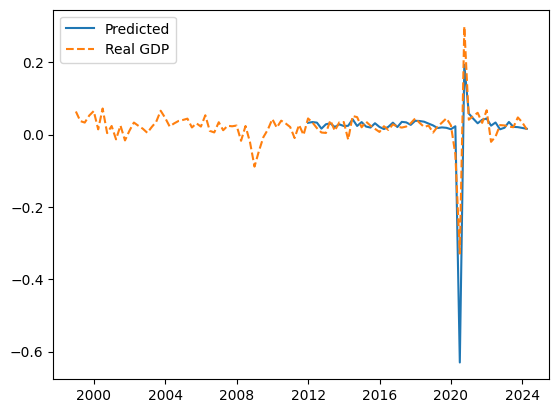

In [26]:
plt.plot(preds_dfs[0].index, preds_dfs[0]['real_gdp'], label='Predicted')
plt.plot(quarterly_input.index, quarterly_input['real_gdp'], label='Real GDP', linestyle='--')
plt.legend()
plt.show()

In [27]:
preds_dfs[0]['real_gdp'].tail(10)

2021-12-31    0.044507
2022-03-31    0.024748
2022-06-30    0.033439
2022-09-30    0.014650
2022-12-31    0.019003
2023-03-31    0.034943
2023-06-30    0.021374
2023-09-30    0.020639
2023-12-31    0.018343
2024-03-31    0.016076
Freq: Q-DEC, Name: real_gdp, dtype: float64

In [28]:
quarterly_input['real_gdp'].dropna().tail(10)

date
2021-12-31    0.067302
2022-03-31   -0.019957
2022-06-30   -0.005655
2022-09-30    0.026258
2022-12-31    0.025336
2023-03-31    0.022194
2023-06-30    0.020393
2023-09-30    0.047472
2023-12-31    0.033396
2024-03-31    0.013997
Freq: Q-DEC, Name: real_gdp, dtype: float64

In [29]:
def get_r_squared(var_name, pred_df, actual_df):
    r2 = np.round(np.corrcoef(pred_df[var_name], actual_df[var_name])[1][0]**2*100, 1)
    return r2
         
#mse = errors_df[var_name][0]
r2 = get_r_squared('eps_growth', preds_dfs[0], quarterly_input.dropna()[start_point:-steps_ahead+1])

#print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

KeyError: 'eps_growth'